<a href="https://colab.research.google.com/github/Rambimo/PCVK_Ganjil_2023/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Rambimo Regeng Pangestu

NIM : 2141720094

Absen : 27

Kelas : TI - 3B

Jurusan/Prodi : Teknologi Informasi / D4 - Teknik Informatika

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


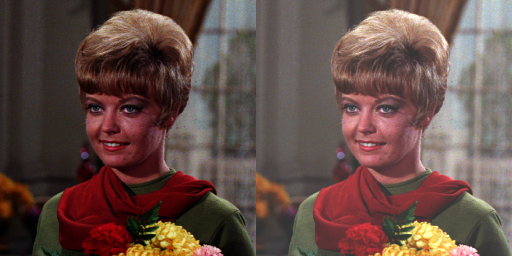

In [9]:
print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScableAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


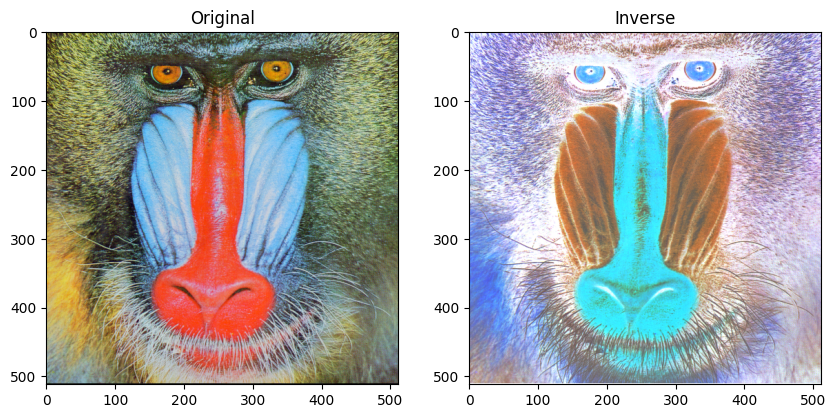

In [21]:
print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/mandrill.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(255 - original[y,x,c] + brightness, 0, 255)

plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
plt.title('Original')

plt.subplot(122)
plt.imshow(cv.cvtColor(brightness_image, cv.COLOR_BGR2RGB))
plt.title('Inverse')

plt.show()

2. mplementasikan transformasi contrast pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga menghasilkan keluaran seperti berikut:

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


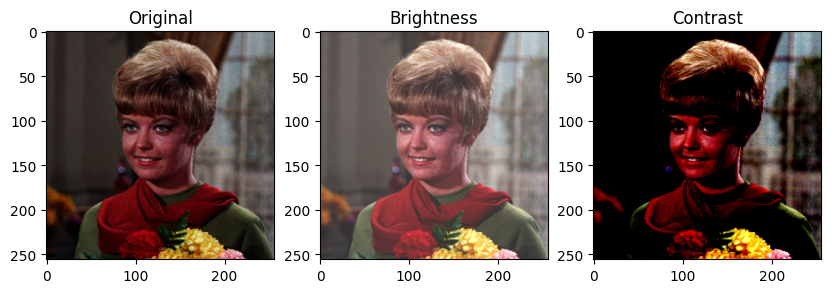

In [20]:
print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
    brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
    contrast_factor = float(input('Masukkan kontras [1.0 - 3.0]: '))
except:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)
contrast_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            new_brightness_value = np.clip(original[y,x,c] + brightness, 0, 255)
            brightness_image[y,x,c] = new_brightness_value

            new_contrast_value = np.clip(contrast_factor * (original[y, x, c] - 128) + 128, 0, 255)
            contrast_image[y, x, c] = new_contrast_value

plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
plt.title('Original')

plt.subplot(132)
plt.imshow(cv.cvtColor(brightness_image, cv.COLOR_BGR2RGB))
plt.title('Brightness')

plt.subplot(133)
plt.imshow(cv.cvtColor(contrast_image, cv.COLOR_BGR2RGB))
plt.title('Contrast')

plt.show()

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi log, sehingga menghasilkan keluaran seperti berikut:

 Mengubah tingkat kecerahan citra dengan transformasi log 
----------------------------------------------------------
Masukkan nilai kecerahan: 50


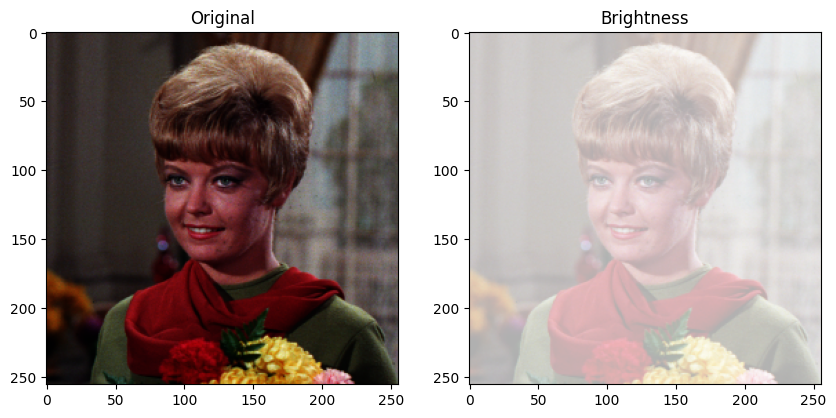

In [19]:
print(' Mengubah tingkat kecerahan citra dengan transformasi log ')
print('----------------------------------------------------------')
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
brightness_log_image = np.log1p(original.astype(float) + brightness)
brightness_log_image = (brightness_log_image / brightness_log_image.max()) * 255
brightness_log_image = np.uint8(brightness_log_image)

plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
plt.title('Original')

plt.subplot(122)
plt.imshow(cv.cvtColor(brightness_log_image, cv.COLOR_BGR2RGB))
plt.title('Brightness')

plt.show()

4.  Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

<ipython-input-18-a0cb9b19bbb0>:9: RuntimeWarning: overflow encountered in ubyte_scalars
  gray_lightness[y, x] = int((max(r, g, b) + min(r, g, b)) / 2)


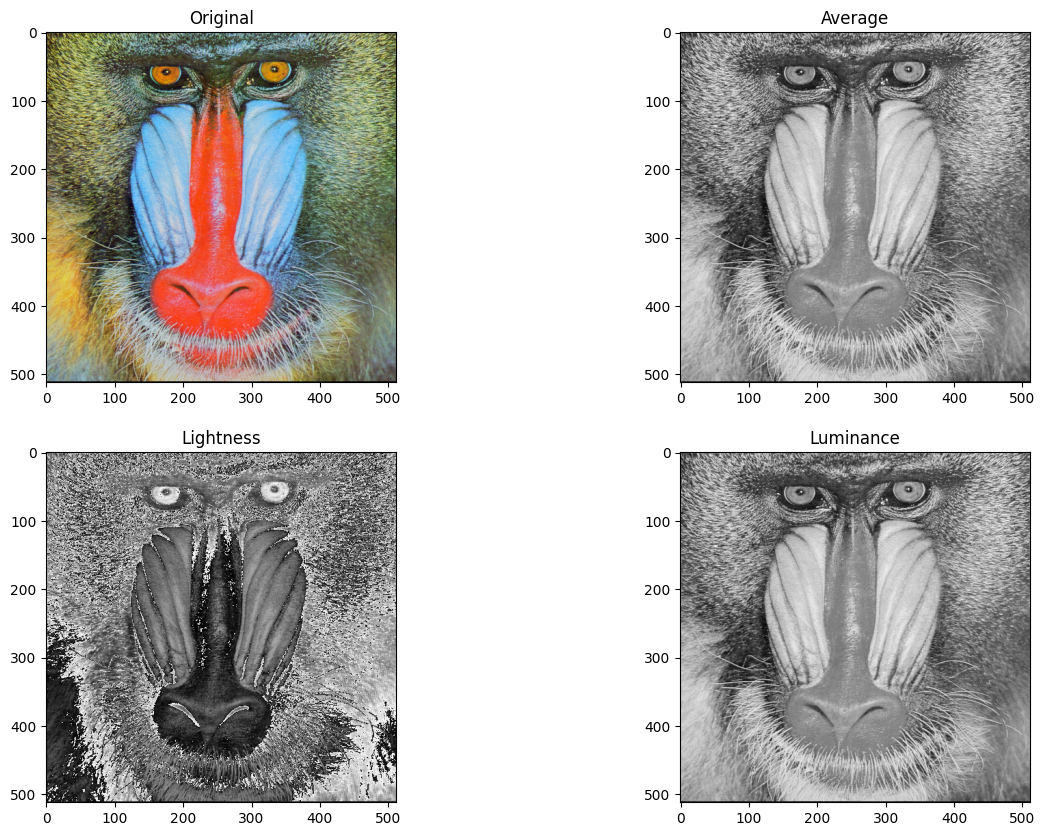

In [18]:
original = cv.imread('/content/drive/MyDrive/PCVK/mandrill.tiff')

gray_averaging = cv.cvtColor(original, cv.COLOR_BGR2GRAY)

gray_lightness = np.zeros(original.shape[:2], dtype=np.uint8)
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        r, g, b = original[y, x]
        gray_lightness[y, x] = int((max(r, g, b) + min(r, g, b)) / 2)

gray_luminance = cv.cvtColor(original, cv.COLOR_BGR2YCrCb)[:, :, 0]

plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
plt.title('Original')

plt.subplot(222)
plt.imshow(gray_averaging, cmap='gray')
plt.title('Average')

plt.subplot(223)
plt.imshow(gray_lightness, cmap='gray')
plt.title('Lightness')

plt.subplot(224)
plt.imshow(gray_luminance, cmap='gray')
plt.title('Luminance')

plt.show()

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna biru menjadi grayscale seperti pada contoh berikut:

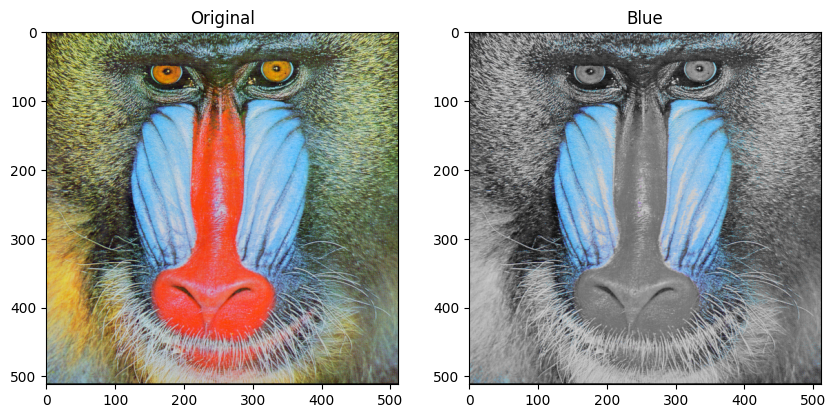

In [22]:
original = cv.imread('/content/drive/MyDrive/PCVK/mandrill.tiff')

hsv_image = cv.cvtColor(original, cv.COLOR_BGR2HSV)

lower_blue = np.array([90, 50, 50])
upper_blue = np.array([150, 255, 255])

mask = cv.inRange(hsv_image, lower_blue, upper_blue)

result = cv.bitwise_and(original, original, mask=mask)

gray_mask = cv.bitwise_not(mask)
gray_part = cv.cvtColor(original, cv.COLOR_BGR2GRAY)
gray_part = cv.cvtColor(gray_part, cv.COLOR_GRAY2BGR)
result_gray = cv.bitwise_and(gray_part, gray_part, mask=gray_mask)

final_result = cv.add(result, result_gray)

plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
plt.title('Original')

plt.subplot(122)
plt.imshow(cv.cvtColor(final_result, cv.COLOR_BGR2RGB))
plt.title('Blue')

plt.show()